# **X^2**

Ciclo: 1 | Erro total: 0.8631
Ciclo: 2 | Erro total: 0.2206
Ciclo: 3 | Erro total: 0.7344
Ciclo: 4 | Erro total: 0.3240
Ciclo: 5 | Erro total: 0.2032
Ciclo: 6 | Erro total: 0.1421
Ciclo: 7 | Erro total: 0.1061
Ciclo: 8 | Erro total: 0.0850
Ciclo: 9 | Erro total: 0.0734
Ciclo: 10 | Erro total: 0.0678
Ciclo: 11 | Erro total: 0.0660
Ciclo: 12 | Erro total: 0.0662
Ciclo: 13 | Erro total: 0.0675
Ciclo: 14 | Erro total: 0.0691
Ciclo: 15 | Erro total: 0.0706
Ciclo: 16 | Erro total: 0.0719
Ciclo: 17 | Erro total: 0.0730
Ciclo: 18 | Erro total: 0.0737
Ciclo: 19 | Erro total: 0.0742
Ciclo: 20 | Erro total: 0.0746
Ciclo: 21 | Erro total: 0.0750
Ciclo: 22 | Erro total: 0.0754
Ciclo: 23 | Erro total: 0.0758
Ciclo: 24 | Erro total: 0.0763
Ciclo: 25 | Erro total: 0.0769
Ciclo: 26 | Erro total: 0.0776
Ciclo: 27 | Erro total: 0.0784
Ciclo: 28 | Erro total: 0.0793
Ciclo: 29 | Erro total: 0.0801
Ciclo: 30 | Erro total: 0.0811
Ciclo: 31 | Erro total: 0.0820
Ciclo: 32 | Erro total: 0.0829
Ciclo: 33 | Erro 

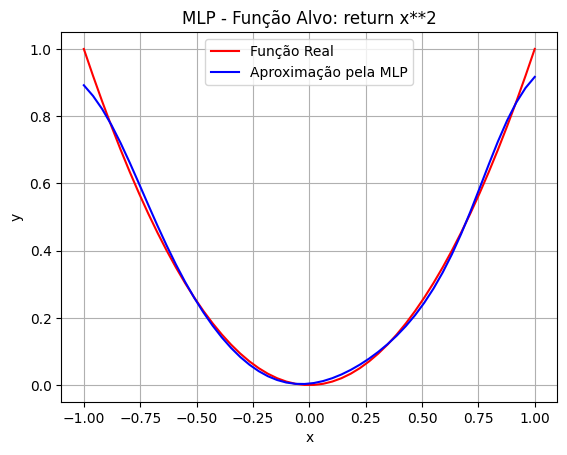

In [1]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**2

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


# **Função Polinomial - X^3 - 2*X + 1**

Ciclo: 1 | Erro total: 12.6690
Ciclo: 2 | Erro total: 10.7684
Ciclo: 3 | Erro total: 10.3273
Ciclo: 4 | Erro total: 10.0983
Ciclo: 5 | Erro total: 9.9363
Ciclo: 6 | Erro total: 9.8105
Ciclo: 7 | Erro total: 9.7091
Ciclo: 8 | Erro total: 9.6252
Ciclo: 9 | Erro total: 9.5543
Ciclo: 10 | Erro total: 9.4935
Ciclo: 11 | Erro total: 9.4406
Ciclo: 12 | Erro total: 9.3941
Ciclo: 13 | Erro total: 9.3527
Ciclo: 14 | Erro total: 9.3157
Ciclo: 15 | Erro total: 9.2823
Ciclo: 16 | Erro total: 9.2519
Ciclo: 17 | Erro total: 9.2242
Ciclo: 18 | Erro total: 9.1988
Ciclo: 19 | Erro total: 9.1754
Ciclo: 20 | Erro total: 9.1537
Ciclo: 21 | Erro total: 9.1336
Ciclo: 22 | Erro total: 9.1149
Ciclo: 23 | Erro total: 9.0974
Ciclo: 24 | Erro total: 9.0810
Ciclo: 25 | Erro total: 9.0657
Ciclo: 26 | Erro total: 9.0512
Ciclo: 27 | Erro total: 9.0376
Ciclo: 28 | Erro total: 9.0247
Ciclo: 29 | Erro total: 9.0125
Ciclo: 30 | Erro total: 9.0009
Ciclo: 31 | Erro total: 8.9899
Ciclo: 32 | Erro total: 8.9795
Ciclo: 33 | E

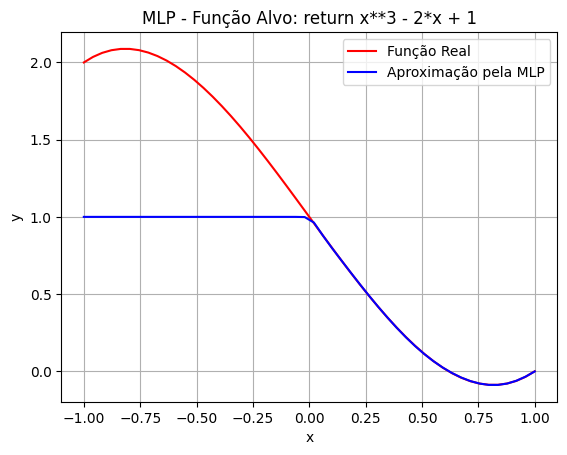

In [3]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**3 - 2*x + 1

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50, 25, 10, 5]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0005        # Erro máximo permitido
ciclos_maximos = 10000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


## **Função trigonométrica - sen(x)**

Ciclo: 1 | Erro total: 0.5898
Ciclo: 2 | Erro total: 0.0110
Ciclo: 3 | Erro total: 0.0516
Ciclo: 4 | Erro total: 0.0340
Ciclo: 5 | Erro total: 0.0286
Ciclo: 6 | Erro total: 0.0239
Ciclo: 7 | Erro total: 0.0202
Ciclo: 8 | Erro total: 0.0174
Ciclo: 9 | Erro total: 0.0150
Ciclo: 10 | Erro total: 0.0131
Ciclo: 11 | Erro total: 0.0115
Ciclo: 12 | Erro total: 0.0102
Ciclo: 13 | Erro total: 0.0090
Ciclo: 14 | Erro total: 0.0080
Ciclo: 15 | Erro total: 0.0072
Ciclo: 16 | Erro total: 0.0065
Ciclo: 17 | Erro total: 0.0058
Ciclo: 18 | Erro total: 0.0053
Ciclo: 19 | Erro total: 0.0048
Ciclo: 20 | Erro total: 0.0044
Ciclo: 21 | Erro total: 0.0040
Ciclo: 22 | Erro total: 0.0036
Ciclo: 23 | Erro total: 0.0033
Ciclo: 24 | Erro total: 0.0030
Ciclo: 25 | Erro total: 0.0028
Ciclo: 26 | Erro total: 0.0025
Ciclo: 27 | Erro total: 0.0023
Ciclo: 28 | Erro total: 0.0021
Ciclo: 29 | Erro total: 0.0020
Ciclo: 30 | Erro total: 0.0018
Ciclo: 31 | Erro total: 0.0017
Ciclo: 32 | Erro total: 0.0015
Ciclo: 33 | Erro 

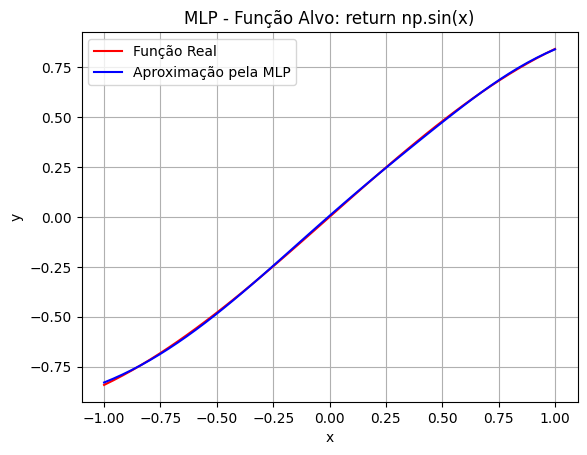

In [4]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
     return np.sin(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Exponencial - exp(x)**

Ciclo: 1 | Erro total: 21.4989
Ciclo: 2 | Erro total: 20.9304
Ciclo: 3 | Erro total: 20.5773
Ciclo: 4 | Erro total: 20.4311
Ciclo: 5 | Erro total: 20.3298
Ciclo: 6 | Erro total: 20.2586
Ciclo: 7 | Erro total: 20.2019
Ciclo: 8 | Erro total: 20.1541
Ciclo: 9 | Erro total: 20.1128
Ciclo: 10 | Erro total: 20.0764
Ciclo: 11 | Erro total: 20.0436
Ciclo: 12 | Erro total: 20.0135
Ciclo: 13 | Erro total: 19.9855
Ciclo: 14 | Erro total: 19.9593
Ciclo: 15 | Erro total: 19.9359
Ciclo: 16 | Erro total: 19.9158
Ciclo: 17 | Erro total: 19.8988
Ciclo: 18 | Erro total: 19.8851
Ciclo: 19 | Erro total: 19.8730
Ciclo: 20 | Erro total: 19.8603
Ciclo: 21 | Erro total: 19.8482
Ciclo: 22 | Erro total: 19.8371
Ciclo: 23 | Erro total: 19.8266
Ciclo: 24 | Erro total: 19.8169
Ciclo: 25 | Erro total: 19.8078
Ciclo: 26 | Erro total: 19.7992
Ciclo: 27 | Erro total: 19.7911
Ciclo: 28 | Erro total: 19.7835
Ciclo: 29 | Erro total: 19.7764
Ciclo: 30 | Erro total: 19.7696
Ciclo: 31 | Erro total: 19.7631
Ciclo: 32 | Erro 

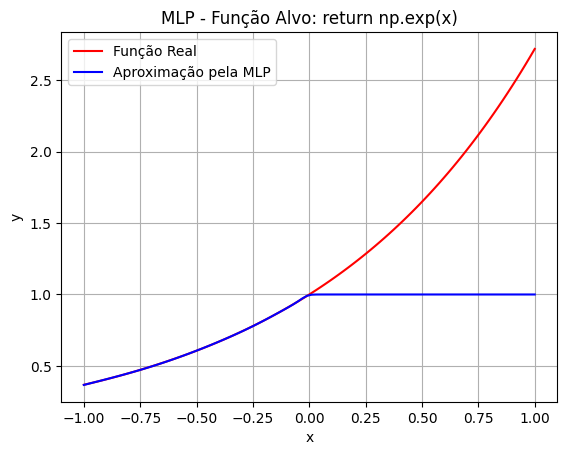

In [5]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.exp(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50, 25, 5]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 10000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 100                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Logaritmica - log(x+2)**

Ciclo: 1 | Erro total: 0.5278
Ciclo: 2 | Erro total: 0.1490
Ciclo: 3 | Erro total: 0.1047
Ciclo: 4 | Erro total: 0.0669
Ciclo: 5 | Erro total: 0.0420
Ciclo: 6 | Erro total: 0.0317
Ciclo: 7 | Erro total: 0.0298
Ciclo: 8 | Erro total: 0.0319
Ciclo: 9 | Erro total: 0.0357
Ciclo: 10 | Erro total: 0.0397
Ciclo: 11 | Erro total: 0.0432
Ciclo: 12 | Erro total: 0.0460
Ciclo: 13 | Erro total: 0.0480
Ciclo: 14 | Erro total: 0.0494
Ciclo: 15 | Erro total: 0.0502
Ciclo: 16 | Erro total: 0.0505
Ciclo: 17 | Erro total: 0.0503
Ciclo: 18 | Erro total: 0.0498
Ciclo: 19 | Erro total: 0.0491
Ciclo: 20 | Erro total: 0.0481
Ciclo: 21 | Erro total: 0.0469
Ciclo: 22 | Erro total: 0.0456
Ciclo: 23 | Erro total: 0.0443
Ciclo: 24 | Erro total: 0.0428
Ciclo: 25 | Erro total: 0.0414
Ciclo: 26 | Erro total: 0.0400
Ciclo: 27 | Erro total: 0.0386
Ciclo: 28 | Erro total: 0.0372
Ciclo: 29 | Erro total: 0.0359
Ciclo: 30 | Erro total: 0.0347
Ciclo: 31 | Erro total: 0.0335
Ciclo: 32 | Erro total: 0.0324
Ciclo: 33 | Erro 

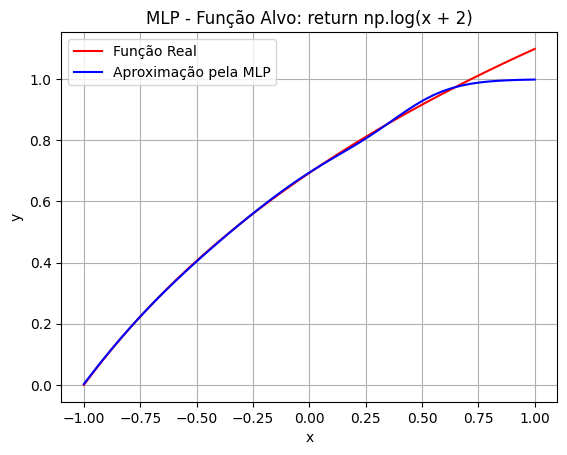

In [5]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.log(x + 2) 

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Modular - |x|**

Ciclo: 1 | Erro total: 2.9761
Ciclo: 2 | Erro total: 0.6940
Ciclo: 3 | Erro total: 0.8867
Ciclo: 4 | Erro total: 0.6187
Ciclo: 5 | Erro total: 0.4458
Ciclo: 6 | Erro total: 0.3388
Ciclo: 7 | Erro total: 0.2636
Ciclo: 8 | Erro total: 0.2082
Ciclo: 9 | Erro total: 0.1664
Ciclo: 10 | Erro total: 0.1346
Ciclo: 11 | Erro total: 0.1103
Ciclo: 12 | Erro total: 0.0918
Ciclo: 13 | Erro total: 0.0778
Ciclo: 14 | Erro total: 0.0673
Ciclo: 15 | Erro total: 0.0595
Ciclo: 16 | Erro total: 0.0537
Ciclo: 17 | Erro total: 0.0496
Ciclo: 18 | Erro total: 0.0466
Ciclo: 19 | Erro total: 0.0445
Ciclo: 20 | Erro total: 0.0430
Ciclo: 21 | Erro total: 0.0420
Ciclo: 22 | Erro total: 0.0412
Ciclo: 23 | Erro total: 0.0407
Ciclo: 24 | Erro total: 0.0404
Ciclo: 25 | Erro total: 0.0401
Ciclo: 26 | Erro total: 0.0398
Ciclo: 27 | Erro total: 0.0396
Ciclo: 28 | Erro total: 0.0393
Ciclo: 29 | Erro total: 0.0391
Ciclo: 30 | Erro total: 0.0389
Ciclo: 31 | Erro total: 0.0386
Ciclo: 32 | Erro total: 0.0384
Ciclo: 33 | Erro 

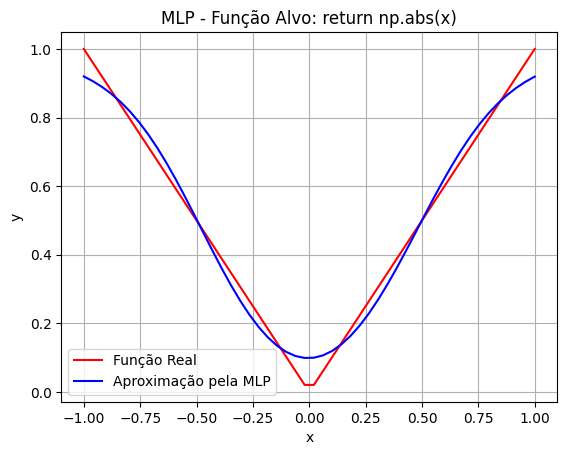

In [6]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.abs(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **x^2 * np.sin(1/x)**

Ciclo: 1 | Erro total: 0.7161
Ciclo: 2 | Erro total: 0.0630
Ciclo: 3 | Erro total: 0.1108
Ciclo: 4 | Erro total: 0.1292
Ciclo: 5 | Erro total: 0.1406
Ciclo: 6 | Erro total: 0.1434
Ciclo: 7 | Erro total: 0.1404
Ciclo: 8 | Erro total: 0.1335
Ciclo: 9 | Erro total: 0.1242
Ciclo: 10 | Erro total: 0.1137
Ciclo: 11 | Erro total: 0.1028
Ciclo: 12 | Erro total: 0.0922
Ciclo: 13 | Erro total: 0.0821
Ciclo: 14 | Erro total: 0.0728
Ciclo: 15 | Erro total: 0.0644
Ciclo: 16 | Erro total: 0.0568
Ciclo: 17 | Erro total: 0.0501
Ciclo: 18 | Erro total: 0.0441
Ciclo: 19 | Erro total: 0.0389
Ciclo: 20 | Erro total: 0.0343
Ciclo: 21 | Erro total: 0.0303
Ciclo: 22 | Erro total: 0.0268
Ciclo: 23 | Erro total: 0.0238
Ciclo: 24 | Erro total: 0.0212
Ciclo: 25 | Erro total: 0.0189
Ciclo: 26 | Erro total: 0.0170
Ciclo: 27 | Erro total: 0.0154
Ciclo: 28 | Erro total: 0.0139
Ciclo: 29 | Erro total: 0.0127
Ciclo: 30 | Erro total: 0.0117
Ciclo: 31 | Erro total: 0.0109
Ciclo: 32 | Erro total: 0.0101
Ciclo: 33 | Erro 

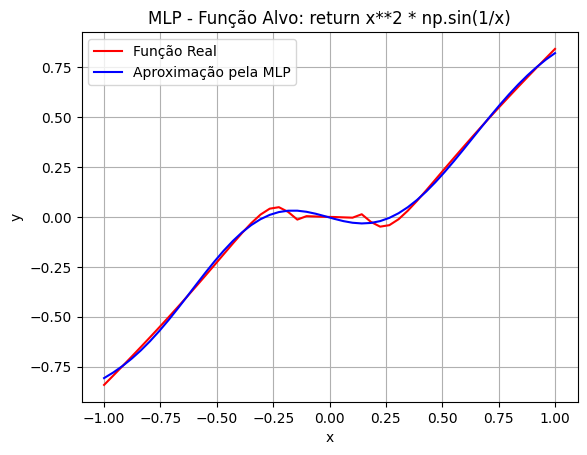

In [8]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**2 * np.sin(1/x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()